Recently I have a friend asking me how to fit a function to some data using python. Here is how we can do it. 

In [32]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('seaborn-poster')

## If you can tell the function form from the data

For example, if I have the following data that actually generated from the function $3e^{-0.05x}+12$, but with some noise. When we see this dataset, we can tell it might be generated from a exponential function.

In [30]:
x = np.arange(-10, 10, 0.1)

# true data generated by this function
y = 3 * np.exp(-0.05*x) + 12

# adding noise to the true data
y += np.random.normal(0, 0.2, size = len(y))

Text(0,0.5,u'y')

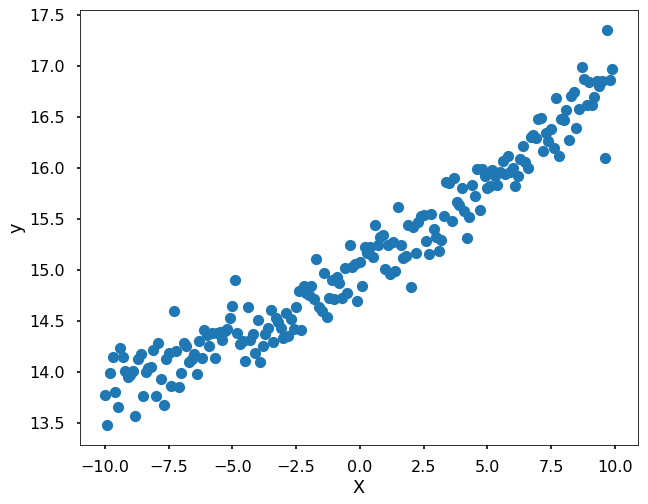

In [33]:
plt.figure(figsize = (10, 8))
plt.plot(x, y, 'o')
plt.xlabel('X')
plt.ylabel('y')

Let's fit the data using scipy function - [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

In [34]:
from scipy.optimize import curve_fit

In [35]:
def func(x, a, b, c):
    return a * np.exp(b * x) + c

In [36]:
popt, pcov = curve_fit(func, x, y)

Text(0,0.5,u'y')

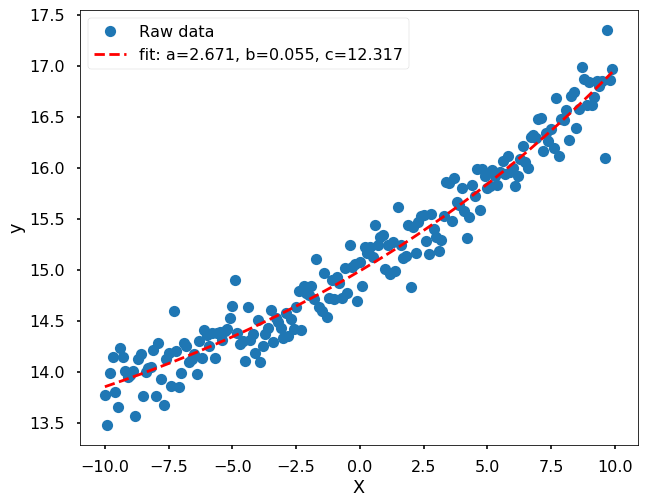

In [40]:
plt.figure(figsize = (10, 8))

plt.plot(x, y, 'o',
    label='Raw data')

plt.plot(x, func(x, *popt), 'r--',
    label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.legend(loc = 2)

plt.xlabel('X')
plt.ylabel('y')

plt.show()

## More complicated case

For a more complicated case that we can not easily guess the form of the function, we could use a Spline to fit the data. For example, we could use [UnivariateSpline](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.interpolate.UnivariateSpline.html). 

In [41]:
from scipy.interpolate import UnivariateSpline

In [93]:
x = np.arange(-20, 20, 0.1)

# true data generated by this function
y = 3 * np.exp(-0.05*x) + 12 + 1.4 * np.sin(1.2*x) + 2.1 * np.sin(-2.2*x + 3)

# adding noise to the true data
y += np.random.normal(0, 1, size = len(y))

Text(0,0.5,u'y')

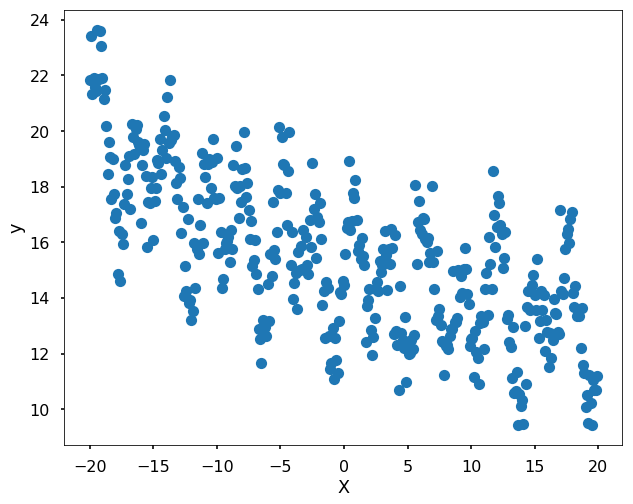

In [98]:
plt.figure(figsize = (10, 8))
plt.plot(x, y, 'o')
plt.xlabel('X')
plt.ylabel('y')

In [96]:
# Note, you need play with the s - smoothing factor
s = UnivariateSpline(x, y, s=15)
xs = np.linspace(-20, 20, 100)
ys = s(xs)

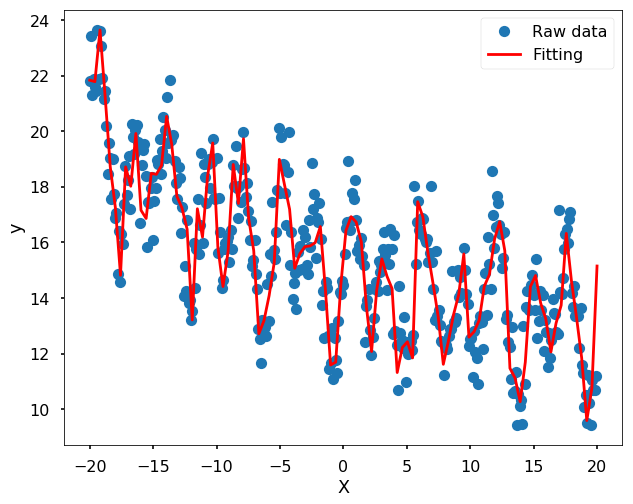

In [97]:
plt.figure(figsize = (10, 8))
plt.plot(x, y, 'o', label = 'Raw data')
plt.plot(xs, ys, 'r', label = 'Fitting')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc = 1)
plt.show()

## Of course, you could also use Machine Learning algorithms

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

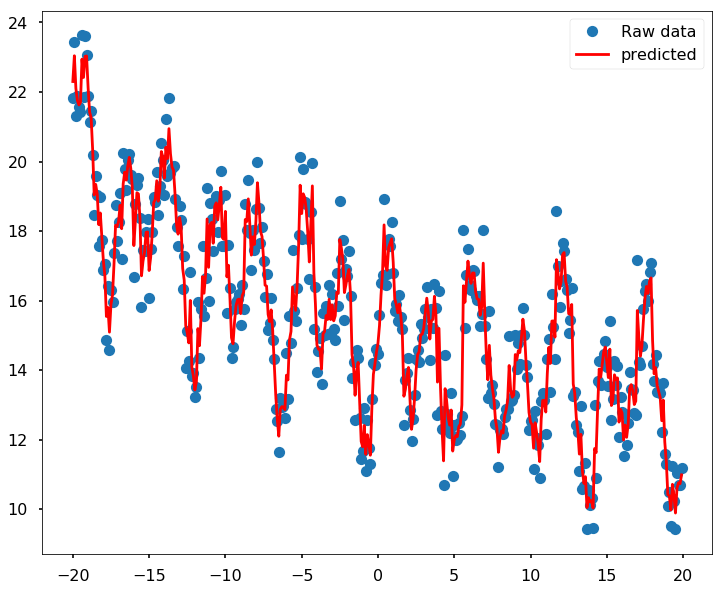

In [103]:
# fit the model and get the estimation for each data points
yfit = RandomForestRegressor(100, random_state=42).fit(x[:, None], y).predict(x[:, None])

plt.figure(figsize = (12,10))
plt.plot(x, y, 'o', label = 'Raw data')
plt.plot(x, yfit, '-r', label = 'predicted', zorder = 10)
plt.legend()